In [3]:
### How to use the squeezer to scan the SRC Mode.

In [4]:
import pykat
import pylab as pl
import numpy as np

                                              ..-
    PyKat 1.1.244         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



In [33]:
kat_code = """
l l1 1 0 n0

tem l1 0 0 0.625 0.0 
tem l1 0 1 0.1 0.0
tem l1 1 0 0.1 0.0
tem l1 1 1 0.075 0.0
tem l1 0 2 0.05 0.0
tem l1 2 0 0.05 0.0

tem l1 2 1 0.05 0.0
tem l1 1 2 0.05 0.0
tem l1 2 2 0.05 0.0

tem l1 3 1 0.05 0.0
tem l1 1 3 0.05 0.0
tem l1 4 0 0.05 0.0
tem l1 0 4 0.05 0.0

# PRM
# AR surface
m2 PRMAR 35u 4.5u $phi_PRM nREFL nPRMARb

# Substrate
s sPRMsub1 0.0737 $nsilica nPRMARb nPRMHRa

# HR surface
m1 PRMHR 0.03 8.5u $phi_PRM nPRMHRa nPRMHRb
attr PRMHR Rc 11.009

# Distance between PRM and PR2
s lp1 $Lpr1 nPRMHRb nPR2a

# PR2
bs1 PR2 250u $Mloss 0 -0.79 nPR2a nPR2b nPOP dump
attr PR2 Rc -4.545

# Distance from PR2 to PR3
s lp2 $Lpr2 nPR2b nPR3a

# PR3
bs1 PR3 0 $Mloss 0 0.615 nPR3a nPR3b dump dump
attr PR3 Rc 36.027

# Distance from PR3
s lp3 $Lpr3 nPR3b nPRBS

###########################################################################
%%% FTend PRC

%%% FTblock BS
###########################################################################

# BS beamsplitter
##------------------------------------------------------------ 
## BS 
##                             ^ 
##                  to IMY     |      
##                             |      ,'-.
##                             |     +    `. 
##                        nYBS |   ,'       :'
##      nPR3b                  |  +i1      +
##         ---------------->    ,:._  i2 ,'
##    from the PRC       nPRBS + \  `-. + nXBS
##                           ,' i3\   ,' --------------->
##                          +      \ +     to IMX
##                        ,'     i4.'
##                       `._      ..
##                          `._ ,' |nSRBS
##                             -   |
##                                 |to the SRC
##                                 |
##                                 v
##------------------------------------------------------------
bs1 BS 0.5 $Mloss $phi_BS 45 nPRBS nYBS nBSi1 nBSi3
s BSsub1 0.0685 $nsilica nBSi1 nBSi2
s BSsub2 0.0684 $nsilica nBSi3 nBSi4
bs2 BSAR1 50u 0 0 -29.195 nBSi2 dump nXBS nPOX
bs2 BSAR2 50u 0 0 29.195 nBSi4 dump nSRBS dump

###########################################################################
%%% FTend BS

%%% FTblock Yarm
###########################################################################

# Distance from beam splitter to Y arm input mirror
s ly1 5.0279 nYBS nITMY11

# Thermal lens correction
lens ITMYTL $TL_f nITMY11 nITMYTLtrans
s ITMYTL_null 0 nITMYTLtrans nITMYconstL_in
lens ITMYconstL inf nITMYconstL_in nITMYconstL_trans
s ITMYTL_null2 0 nITMYconstL_trans nITMY1

# Y arm input mirror
m2 ITMYAR 20u 0 $phi_ITMY nITMY1 nITMYs1
s ITMYsub 0.2 $nsilica nITMYs1 nITMYs2
m1 ITMYHR 0.014 $Mloss $phi_ITMY nITMYs2 nITMY2
#m1 ITMYHR 0 $Mloss $phi_ITMY nITMYs2 nITMY2
attr ITMYHR Rc -1934

# Y arm length
s LYarm 3994.5 nITMY2 nETMY1

# Y arm end mirror
m1 ETMYHR 5u $Mloss $phi_ETMY nETMY1 nETMYs1
s ETMYsub 0.2 $nsilica nETMYs1 nETMYs2
m2 ETMYAR 500u 0 $phi_ETMY nETMYs2 nPTY
attr ETMYHR Rc 2245


###########################################################################
%%% FTend Yarm

%%% FTblock Xarm
###########################################################################

# Distance from beam splitter to X arm input mirror 
s lx1 5.0082 nXBS nITMX11

# Thermal lens correction
lens ITMXTL $TL_f nITMX11 nITMXTLtrans
s ITMXtl_null 0 nITMXTLtrans nITMXconstL_in
lens ITMXconstL inf nITMXconstL_in nITMXconstL_trans
s ITMXTL_null2 0 nITMXconstL_trans nITMX1

# X arm input mirror
m2 ITMXAR 20u 0 $phi_ITMX nITMX1 nITMXs1
s ITMXsub 0.2 $nsilica nITMXs1 nITMXs2
m1 ITMXHR 0.014 $Mloss $phi_ITMX nITMXs2 nITMX2
#m1 ITMXHR 0 $Mloss $phi_ITMX nITMXs2 nITMX2
attr ITMXHR Rc -1934

# X arm length
s LXarm 3994.5 nITMX2 nETMX1

# X arm end mirror
m1 ETMXHR 5u $Mloss $phi_ETMX nETMX1 nETMXs1
s ETMXsub 0.2 $nsilica nETMXs1 nETMXs2
m2 ETMXAR 500u 0 $phi_ETMX nETMXs2 nPTX
attr ETMXHR Rc 2245

###########################################################################
%%% FTend Xarm

%%% FTblock SRC
###########################################################################

# Distance to SR3
s ls3 $Lsr3 nSRBS nSR3b

# SR3
bs1 SR3 0 $Mloss 0 0.785 nSR3b nSR3a dump dump
attr SR3 Rc 35.972841

# Distance from SR3 to SR2
s ls2 $Lsr2 nSR3a nSR2b

# SR2
bs1 SR2 0 $Mloss 0 -0.87 nSR2b nSR2a dump dump
attr SR2 Rc -6.406

# Distance from SR2 to SRM
s ls1 $Lsr1 nSR2a nSRMHRa

# Signal recycling mirror SRM-08
m1 SRMHR $T_SRM $L_SRM $phi_SRM nSRMHRa nSRMHRb
s SRMsub 0.0749 $nsilica nSRMHRb nSRMARa
m2 SRMAR 50n 0 $phi_SRM nSRMARa nSRMARb
attr SRMHR Rc -5.6938

#Mode-matching telescope counteract lensing.
s lSRMTT1  0 nSRMARb nSRMTT1a
lens SRMTT1 inf  nSRMTT1a nSRMTT1b

s lSRMTT2 0 nSRMTT1b nSRMTT2a 
lens SRMTT2 inf nSRMTT2a nSRMTT2b
###########################################################################
%%% FTend SR

%%% FTblock FI
###########################################################################
# The FI is on a platform delimited by the Input/Output Buffer Assy (I/OBA)
# The physical distance IBA --> OBA = 0.5034 (D0901920-V13)
# OFI design based on: D0900464, D1002598

# Distance from SRM (AR surface) to the input buffle assy (IBA) in OFI sus
s lIBAin 0.491516 nSRMTT2b nIBAin
m1 IBA 1 0 0 nIBAin nIBAout

# Distance from IBA to input of OFI (Prism in between not considered)
s lOFIin 0.16 nIBAout nOFIin

# Input Polirizer IP (Silica)
bs1 IP 1 0 0 0 nOFIin dump nIPtrans dump
s lIP 0.019 $nsilica nIPtrans nROTin

# Rotator (TGG)
m1 ROTin 1 0 0 nROTin nROTb
s lROT 0.08285 $nTGG nROTb nROTouta
m1 ROTout 1 0 0 nROTouta nOPa

# Output polirizer OP (Silica)
s lOP 0.019 $nsilica nOPa nOPb

#bs OP 0 1 0 0 nOPb dump nOPd dump

# use new isolator option for injecting the squeezed field
# nOPd is the output towards OMC
# nOPb is the input from SRC
# nOPc is the input from squeezer
#isol* OP 100000 nOPd nOPb nOPc
#isol OP 100000 nOPb nOPd
dbs OPP nOPb nOPc nOPd nOPz

# need a bunch of dummy spaces to keep refractive index the same over isol nodes

# output port of FI where squeezed field is injected
s lOP2 0 $nsilica nOPc nOPe
m1 mOFIout2 1 0 0 nOPe nOFIout2

s lOP3 0 $nsilica nOPd nOPf
m1 mOPinterface 1 0 0 nOPf nOFIout


# Waveplate thickness 
s lWP 0.0127 $nCalcite nOFIout nWPa
m1 WP 1 0 0 nWPa nWPb

# Distance from Waveplate to OBA of OFI (Prism in between not considered)
s lOBA 0.2098563 nWPb nOBAin
m1 OBA 1 0 0 nOBAin nOBAout

%%% FTend FI

#### Mode matching from OPO

#### Mode matching from OPO
s ssqz_lens1 0.353 n0 nsqz_lens1a
lens sqz_lens1 0.111 nsqz_lens1a nsqz_lens1b
s ssqz_lens1_lens2 0.54 nsqz_lens1b nsqz_lens2a
lens sqz_lens2 0.334 nsqz_lens2a nsqz_lens2b

# Distance lensSqz2 --> ZM1
s lzm1 2.6 nsqz_lens2b nZM1a 

# ZM1
bs1 ZM1 10u $Mloss 0 45 nZM1a nZM1b dump dump

# Distance ZM1 --> ZM2
s lzm2 10.0 nZM1b nZM2a
bs1 ZM2 10u $Mloss 0 45 nZM2a nZM2b dump dump

# Distance ZM2 --> OFI 
s lzm2fi 1.00 nZM2b nOFIout2


%%% FTblock OMCpath
###########################################################################
# (Loctions and angles based on the solid work file D1000342-v14 give ~5% 
# mismatch. Thus lom1, lom3omc have been adjusted to get ~99.7% overlap at the OMC)
# (lom1=2.6334,lom3omc=0.24.8 give 99% overlap at OMC)

# Distance OBA --> OM1  
s lom1 2.5034 nOBAout nOM1a 

#OM1
bs1 OM1 800u $Mloss 0 2.251 nOM1a nOM1b nOM1trans dump # T is set for high power; Loss is a guess
attr OM1 Rc 4.6

# Distance OM1 --> OM2
s lom2 1.385 nOM1b nOM2a 

# OM2
bs1 OM2 10u $Mloss 0 4.399 nOM2a nOM2b dump dump  # T is a guess
attr OM2 Rc 1.7058

# Distance OM2 --> OM3
s lom3 0.631 nOM2b nOM3a 
bs1 OM3 10u $Mloss 0 30.037 nOM3a nOM3b nOM3trans dump # T is a guess

# Distance OM3 --> OMC input coupler IC (AR side)
s lom3omc 0.35 nOM3b nOMC_ARIC_in # By design should be ~0.31

#  Distance in transmission to OM3 used for testing
s lomOM3trans 0.1 nOM3trans nOMC_ARIC2_in

# Input Coupler IC (flat mirror)
bs1 OMC_ARIC 1 0 0 4.004 nOMC_ARIC_in dump nOMC_ARIC_trans dump 
s subOMC_IC 0.01078 $nsilica nOMC_ARIC_trans nOMC_HRIC_in
bs1 OMC_HRIC 0.0076 10u 0 2.7609 nOMC_HRIC_in dump nOMC_HRIC_trans nOMC_HRICret
# Distance from IC to OC 
s OMC_ICOC 0.2815 1 nOMC_HRIC_trans nOMC_HROC_in

# Output Coupler OC (flat mirror)
bs1 OMC_HROC 0.0075 10u 0 4.004 nOMC_HROC_in nOMC_HROC_refl nOMC_HROC_trans nOMC_HROC_ret
s subOMC_OC 0.01078 $nsilica nOMC_HROC_trans nOMC_AROC_in
bs1 OMC_AROC 1 0 0 2.7609 nOMC_AROC_in dump nOMC_AROC_trans dump
# Distance from OC to CM1
s OMC_OCCM1 0.2842 1 nOMC_HROC_refl nOMC_CM1_in

# Curved Mirror CM1
bs1 OMC_CM1 36u 10u 0 4.004 nOMC_CM1_in nOMC_CM1_refl dump dump

# Distance from CM1 to CM2 
s OMC_CM1CM2 0.2815 1 nOMC_CM1_refl nOMC_CM2_in
attr OMC_CM1 Rc 2.57321

# Curved Mirror CM2
bs1 OMC_CM2 35.9u 10u 0 4.004 nOMC_CM2_in nOMC_CM2_refl dump dump
attr OMC_CM2 Rc 2.57369

# Distance from CM2 to IC 
s CM2OC 0.2842 1 nOMC_CM2_refl nOMC_HRICret

#Detectors
bp q_SRM_x x q nSRMARa
bp q_SRM_y y q nSRMARa

bp z_BS_x x z nPRBS
bp z_BS_y y z nPRBS

bp zr_BS_x x zr nPRBS
bp zr_BS_y y zr nPRBS

bp w_BS_x x w nPRBS
bp w_BS_y y w nPRBS

bp r_BS_x x r nPRBS
bp r_BS_y y r nPRBS

#cp cavSRX x stability
#cp cavSRX y stability
#cp cavSRY x stability
#cp cavSRY y stability

#cp cavSRX x gouy
#cp cavSRX y gouy
#cp cavSRY x gouy
#cp cavSRY y gouy

pd OM1_Trans_DCPD nOM1trans
pd OMC_Trans_DCPD nOMC_AROC_trans

pd ReflDCPD nPRMHRa

#Constants
const Lprc 57.656
const Lsrc 56.008
const Lschnupp 0.08

const Lpr1 16.6107
const Lpr2 16.1647
const Lpr3 19.5381 

const Lsr1 15.7586
const Lsr2 15.4435
const Lsr3 19.3661

# Arms
const BSthickness 0.06873

func Laver = $Lprc - $Lpr1 - $Lpr2 - $Lpr3
noplot Laver

# x length between BS and ITM
func Lmx = $Laver + 0.5*$Lschnupp - $BSthickness * $nsilica - 0.2*$nsilica
noplot Lmx
put lx1 L $Lmx

# y length between BS and ITM
func Lmy = $Laver - 0.2*$nsilica - 0.5*$Lschnupp
noplot Lmy   
put ly1 L $Lmy

# Lsr3
%func Lasrc = $Laver + $BSthickness * $nsilica
%noplot Lasrc
%func Lsr3 = $Lsrc - $Lsr1 - $Lsr2 - $Lasrc
#noplot Lsr3
%put ls3 L $Lsr3

###########################################################################
%%% FTend Lengths

%%% FTblock HOMs
###########################################################################
#maxtem 4

cav cavPRX PRMHR nPRMHRb ITMXHR nITMXs2
cav cavPRY PRMHR nPRMHRb ITMYHR nITMYs2
cav cavSRX SRMHR nSRMHRa ITMXHR nITMXs2
cav cavSRY SRMHR nSRMHRa ITMYHR nITMYs2
cav cavOMC OMC_HROC nOMC_HROC_refl OMC_HROC nOMC_HROC_in

###########################################################################
%%% FTend HOMs

%%% FTblock Reflectivities
###########################################################################
const Mloss 37.5u
const T_SRM 0.3234
const L_SRM 8.7u
###########################################################################
%%% FTend Reflectivities

%%% FTblock Constants
###########################################################################
const nsilica 1.44963098985906
const nTGG 1.954
const nCalcite 1.65846

const fM 36.397884M
const fP 54.596826M
const TL_f 34.5k
###########################################################################
%%% FTend Constants

%%% FTblock Tunings
###########################################################################
#const phi_SRM 90.0079280184854
#const phi_PRM 90.000176707384252606
const phi_SRM 0.0079280184854
const phi_PRM 0.000176707384252606
const phi_ITMX 90.0
const phi_ITMY 90.0
const phi_ETMX 0.0
const phi_ETMY 0.0
const phi_BS 0.0

###Commands
#xaxis PRMHR phi lin -180 180 500
#xaxis ITMXHR phi lin -180 180 500
#xaxis BS phi lin -180 180 500
xaxis l1 f lin -4M 4M 2000
#xaxis ZM1 phi lin -180 180 100
yaxis abs
maxtem 4
"""

In [34]:
#Get the mode of the OMC
basekat = pykat.finesse.kat() 
basekat.parseCommands(kat_code)
kat = basekat.deepcopy()

#Turn off all cavity commands so I don't get confused
for cav in kat.getAll(pykat.commands.cavity):
    cav.enabled = False

kat.cavPRX.enabled = True
kat.cavPRY.enabled = True
    
kat.ETMXHR.T.value = 1.0
kat.ETMXHR.R.value = 0.0
kat.ETMXHR.L.value = 0.0

kat.ETMYHR.T.value = 1.0
kat.ETMYHR.R.value = 0.0
kat.ETMYHR.L.value = 0.0

#kat.PRMHR.T.value = 1.0
#kat.PRMHR.R.value = 0.0
#kat.PRMHR.L.value = 0.0

kat.SRMHR.T.value = 1.0
kat.SRMHR.R.value = 0.0
kat.SRMHR.L.value = 0.0

outSRC = kat.run()

C:\Users\tvo88\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: parseCommands depreciated, use parse.
  This is separate from the ipykernel package so we can avoid doing imports until


Parsing `tem l1 0 0 0.625 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 0 1 0.1 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 1 0 0.1 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 1 1 0.075 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 0 2 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 2 0 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 2 1 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 1 2 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 2 2 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 3 1 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `tem l1 1 3 0.05 0.0` into pykat object not implemented yet, added as extra line.
Parsing `t

 97% | ETA:  0:00:00 | Calculating                                             


Finished in 13.2087 seconds


100% | ETA:  0:00:00 | Calculating                                             

C:\Users\tvo88\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


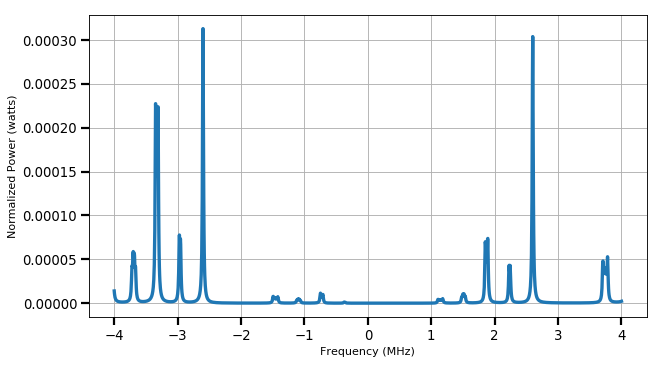

In [35]:
pl.figure(figsize=(9, 5), dpi=80)

pl.plot(-outSRC.x/1e6,outSRC['ReflDCPD'], '-',linewidth=3)
#pl.plot(-outSRC.x/1e6,outSRC['OMC_Trans_DCPD'], '-',linewidth=3)


pl.xlabel("Frequency (MHz)")
pl.ylabel("Normalized Power (watts)")

###Main plot formatting
pl.tick_params(labelsize=12)
pl.tick_params(which='both', width=2)
pl.tick_params(which='major', length=7)
pl.tick_params(which='minor', length=4)
pl.grid(True, zorder=-1)
pl.legend(fontsize=20)

pl.show()

In [36]:
print(outSRC['cavSRX_x_stability'][0])
print(outSRC['cavSRX_y_stability'][0])
print(outSRC['cavSRY_x_stability'][0])
print(outSRC['cavSRY_y_stability'][0])

BasePyKatException: No output by the name 'cavSRX_x_stability' found in the output

In [ ]:
print(outSRC['cavSRX_x_gouy'][0])
print(outSRC['cavSRX_y_gouy'][0])
print(outSRC['cavSRY_x_gouy'][0])
print(outSRC['cavSRY_y_gouy'][0])